<a href="https://colab.research.google.com/github/eseblanco/CiDatTecMod2/blob/main/tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Exploración y Preprocesamiento de Datos

## Curso: Aprendizaje Automático - Ciencia de Datos

## Prof. Dr.Ing. Felipe Meza-Obando

### Estudiantes

   - Roberto Baltodano

   - Sergio Blanco




# Selección del Dataset

Se realizaron consultas en Internet de varios repositorios de DataSets públicos y se identificó el siguiente conjunto de datos:

https://www.kaggle.com/datasets/diegorojasdiaz/123-emergency-calls-in-bogota

## Descripcion del conjunto de datos:

Contexto
Este conjunto de datos relaciona llamadas de emergencia realizadas a través de la línea 123 y fueron clasificadas como de salud.

Contenido
Información en el archivo de metadatos sobre las características.

Expresiones de gratitud
Fuente:
** https://datosabiertos.bogota.gov.co/dataset/llamadas-de-urgencias-y-emergencias-que-ingresan-a-traves-de-la-linea-123
**Secretaría Distrital de Salud

Inspiración
Obteniendo información de uno de los flujos constantes de llamadas entrantes que tenemos en Bogotá - COL

Descripción

Se pueden encontrar diferentes escenarios en los que las personas llaman al 123 para informar múltiples tipos de incidentes en los que sus vidas aparentemente estaban en peligro.




In [2]:
import os
import kagglehub
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
import polars as pl

%matplotlib inline

#https://www.kaggle.com/datasets/diegorojasdiaz/123-emergency-calls-in-bogota
# Download latest version
path = kagglehub.dataset_download("diegorojasdiaz/123-emergency-calls-in-bogota")

print("\n Path to dataset files:\n\n", path)



100%|██████████| 4.59M/4.59M [00:00<00:00, 4.92MB/s]

Extracting files...



 Path to dataset files:

 /root/.cache/kagglehub/datasets/diegorojasdiaz/123-emergency-calls-in-bogota/versions/4


# Carga del Archivo

## Con Pandas

---




In [3]:
emergencia_data = pd.read_csv(path+"/clean_df_123.csv")

emergencia_data.head()



/tmp/ipython-input-183641980.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  emergencia_data = pd.read_csv(path+"/clean_df_123.csv")


,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,CLASIFICACION_FINAL
0,2019-01-01 00:04:37,11,Suba,NaN,NaN,Norte,Lesiones personales,Alta,Cancelado
1,2019-01-01 00:07:41,3,Santa Fe,51.0,Femenino,Norte,Dolor torácico,Alta,Traslado
2,2019-01-01 00:07:46,10,Engativá,NaN,NaN,Norte,Inconsciente/paro cardiorrespiratorio,Alta,Falsa Alarma
3,2019-01-01 00:08:06,16,Puente Aranda,NaN,NaN,Sur,Accidente de tránsito con heridos/muertos,Alta,Cancelado
4,2019-01-01 00:10:26,15,Antonio Nariño,NaN,NaN,Norte,Inconsciente/paro cardiorrespiratorio,Alta,Cancelado


## Con Polars

In [4]:
emergencia_data_pl = pl.read_csv(f"{path}/clean_df_123.csv")

# Mostrar las primeras filas con Polars
# 'head()' funciona de manera similar a Pandas
print("\nPrimeras filas del DataFrame de Polars:\n")
print(emergencia_data_pl.head())


Primeras filas del DataFrame de Polars:

shape: (5, 9)
┌─────────────┬─────────────┬─────────────┬──────┬───┬───────┬────────────┬───────────┬────────────┐
│ FECHA_INICI ┆ CODIGO_LOCA ┆ LOCALIDAD   ┆ EDAD ┆ … ┆ RED   ┆ TIPO_INCID ┆ PRIORIDAD ┆ CLASIFICAC │
│ O_DESPLAZAM ┆ LIDAD       ┆ ---         ┆ ---  ┆   ┆ ---   ┆ ENTE       ┆ ---       ┆ ION_FINAL  │
│ IENTO_MO…   ┆ ---         ┆ str         ┆ i64  ┆   ┆ str   ┆ ---        ┆ str       ┆ ---        │
│ ---         ┆ i64         ┆             ┆      ┆   ┆       ┆ str        ┆           ┆ str        │
│ str         ┆             ┆             ┆      ┆   ┆       ┆            ┆           ┆            │
╞═════════════╪═════════════╪═════════════╪══════╪═══╪═══════╪════════════╪═══════════╪════════════╡
│ 2019-01-01  ┆ 11          ┆ Suba        ┆ null ┆ … ┆ Norte ┆ Lesiones   ┆ Alta      ┆ Cancelado  │
│ 00:04:37    ┆             ┆             ┆      ┆   ┆       ┆ personales ┆           ┆            │
│ 2019-01-01  ┆ 3           ┆ Santa

# Trabajo de Preprocesamiento.

Para cada Columna se estará analizando con el fin de aplicar técnicas de preprocesamiento si ameritan.

De la misma forma se estará realizando el Analisis Exploratorio de Datos  generando si es posible gráficos de analisis en cada una de las librerías indicadas   Matplotlib, Seaborn

De igual manera se estará manejando el análisis con el uso de Pandas y Polars.

Al final del trabajo de preprocesamiento se dará  un análisis entre las librerías utilizadas.


## Trabajo para la Columna EDAD

Se procesderá a analizar el estado del atributo EDAD generando la siguiente información.


### Con Pandas

In [6]:
# Contar la cantidad de valores NaN en la columna 'EDAD'
emergencia_data['EDAD'] = pd.to_numeric(emergencia_data['EDAD'], errors='coerce')
nan_count = emergencia_data['EDAD'].isna().sum()
print(f"Cantidad total de lineas ': {len(emergencia_data)}  \n")
print(f"Cantidad de valores NaN en la columna 'EDAD': {nan_count}  \n")
print(f"Cantidad de valores en la columna 'EDAD': {len(emergencia_data) - nan_count}  \n")
print(f"Porcentaje de valores en la columna 'EDAD': { nan_count / len(emergencia_data) *100 }  \n")
print(f"Valor maximo es {emergencia_data['EDAD'].max()} \n")
print(f"Valor mínimo es {emergencia_data['EDAD'].min()} \n ")
print(f"Media de la EDAD  {emergencia_data['EDAD'].mean()} \n")
print(f"Mediana de la EDAD {emergencia_data['EDAD'].median()} \n")
print(f"Moda de la EDAD {emergencia_data['EDAD'].mode()[0]} \n")
print(f"Desviación estándar de la EDAD {emergencia_data['EDAD'].std()} \n")
print(f"Percentil 25 de la EDAD {emergencia_data['EDAD'].quantile(0.25)} \n")
print(f"Percentil 75 de la EDAD {emergencia_data['EDAD'].quantile(0.75)} \n")



Cantidad total de lineas ': 242241  

Cantidad de valores NaN en la columna 'EDAD': 112310  

Cantidad de valores en la columna 'EDAD': 129931  

Porcentaje de valores en la columna 'EDAD': 46.362919571831355  

Valor maximo es 99.0 

Valor mínimo es 0.0 
 
Media de la EDAD  45.76640678513981 

Mediana de la EDAD 40.0 

Moda de la EDAD 22.0 

Desviación estándar de la EDAD 24.875533649404513 

Percentil 25 de la EDAD 24.0 

Percentil 75 de la EDAD 67.0 



### Con Polars

In [14]:
df_processed = emergencia_data_pl.with_columns(
    pl.col('EDAD').cast(pl.Float64, strict=False).alias('EDAD_NUMERIC')
)
edad_col = 'EDAD_NUMERIC'

# 2. Obtener el total de líneas y realizar todas las agregaciones en una sola expresión
total_lines = df_processed.height

# Usamos .select() para calcular todas las estadísticas deseadas de manera eficiente.
stats_df = df_processed.select(
    nan_count = pl.col(edad_col).is_null().sum(),
    max_val = pl.col(edad_col).max(),
    min_val = pl.col(edad_col).min(),
    mean_val = pl.col(edad_col).mean(),
    median_val = pl.col(edad_col).median(),
    std_val = pl.col(edad_col).std(),
    p25_val = pl.col(edad_col).quantile(0.25),
    p75_val = pl.col(edad_col).quantile(0.75),
    # mode() devuelve una Series/List, tomamos el primer elemento con .first()
    mode_val = pl.col(edad_col).mode().first()
).row(0)


nan_count = stats_df[0]
max_val = stats_df[1]
min_val = stats_df[2]
mean_val = stats_df[3]
median_val = stats_df[4]
std_val = stats_df[5]
p25_val = stats_df[6]
p75_val = stats_df[7]
mode_val = stats_df[8]

# Cálculos secundarios
valid_count = total_lines - nan_count
nan_percentage = (nan_count / total_lines) * 100

# Imprimir resultados
print(f"Cantidad total de lineas: {total_lines} \n")
print(f"Cantidad de valores NaN en la columna 'EDAD': {nan_count} \n")
print(f"Cantidad de valores en la columna 'EDAD': {valid_count} \n")
print(f"Porcentaje de valores en la columna 'EDAD': {nan_percentage:.4f} % \n")
print(f"Valor máximo es {max_val:.2f} \n")
print(f"Valor mínimo es {min_val:.2f} \n")
print(f"Media de la EDAD: {mean_val:.2f} \n")
print(f"Mediana de la EDAD: {median_val:.2f} \n")
print(f"Moda de la EDAD: {mode_val:.2f} \n" if mode_val is not None else "Moda de la EDAD: N/A (Ninguna) \n")
print(f"Desviación estándar de la EDAD: {std_val:.2f} \n")
print(f"Percentil 25 de la EDAD: {p25_val:.2f} \n")
print(f"Percentil 75 de la EDAD: {p75_val:.2f} \n")




Cantidad total de lineas: 242241 

Cantidad de valores NaN en la columna 'EDAD': 112310 

Cantidad de valores en la columna 'EDAD': 129931 

Porcentaje de valores en la columna 'EDAD': 46.3629 % 

Valor máximo es 99.00 

Valor mínimo es 0.00 

Media de la EDAD: 45.77 

Mediana de la EDAD: 40.00 

Moda de la EDAD: N/A (Ninguna) 

Desviación estándar de la EDAD: 24.88 

Percentil 25 de la EDAD: 24.00 

Percentil 75 de la EDAD: 67.00 



###  Grafico de Edad

**utilizando matplotlib**

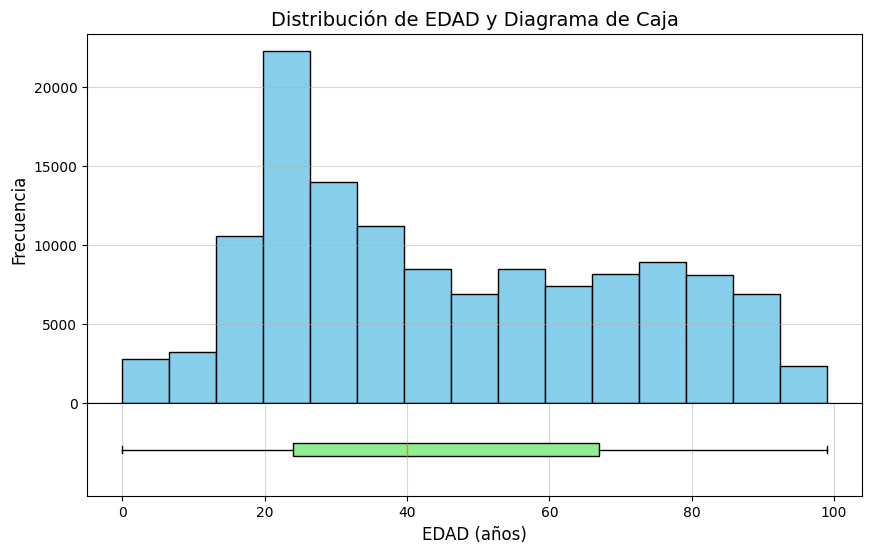

In [ ]:
#Grafico de Edad


#
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]} # Proporción de alturas [4 (hist), 1 (box)]
)

# 2. Eliminar el espacio vertical entre los subplots
fig.subplots_adjust(hspace=0)

# --- Histograma de EDAD (Superior) ---
# Se utiliza ax_hist para el histograma
ax_hist.hist(
    emergencia_data['EDAD'].dropna(),
    bins=15,
    color='skyblue',
    edgecolor='black'
)
ax_hist.set_title('Distribución de EDAD y Diagrama de Caja', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.grid(axis='y', alpha=0.5)

# Ocultar las etiquetas del eje X en el histograma para evitar redundancia
ax_hist.tick_params(axis="x", labelbottom=False)

# --- Box Plot (Diagrama de Caja) de EDAD (Inferior) ---
# Se utiliza ax_box para el box plot
ax_box.boxplot(
    emergencia_data['EDAD'].dropna(),
    vert=False, # Horizontal
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='black'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5) # Estilo de Outliers
)
ax_box.set_xlabel('EDAD (años)', fontsize=12)
ax_box.set_yticks([]) # Eliminar la etiqueta de Y para el box plot
ax_box.grid(axis='x', alpha=0.5)

plt.show()



**Usando SEABORN**

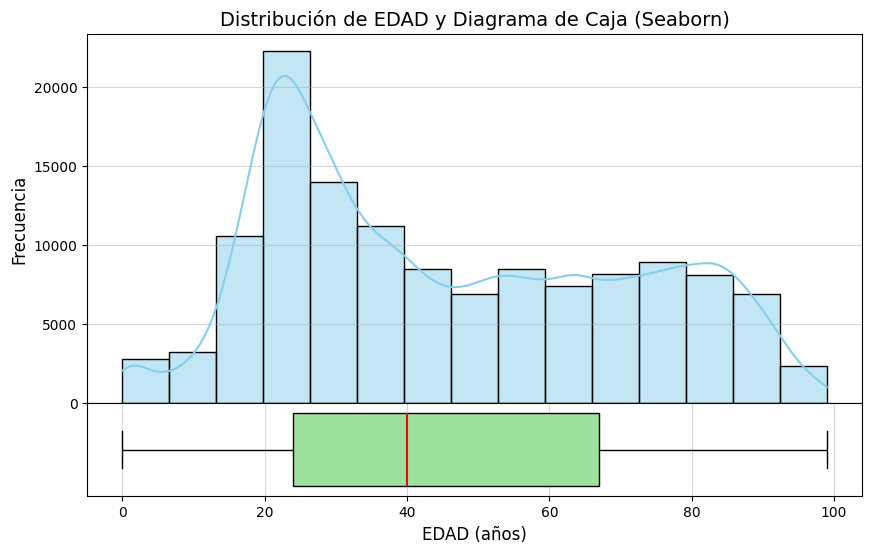

In [15]:
## Usando SEABORN

edad_data = emergencia_data['EDAD'].dropna()

fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [4, 1]} # Proporción de alturas [4 (hist), 1 (box)]
)

# 2. Eliminar el espacio vertical entre los subplots
fig.subplots_adjust(hspace=0)

# ----------------------------------------------------
# --- Histograma de EDAD (Superior) usando sns.histplot ---
# ----------------------------------------------------
sms.histplot(
    x=edad_data,
    ax=ax_hist,
    bins=15,
    color='skyblue',
    edgecolor='black',
    kde=True  # Opcional: añade la estimación de densidad del kernel (curva suave)
)
ax_hist.set_title('Distribución de EDAD y Diagrama de Caja (Seaborn)', fontsize=14)
ax_hist.set_ylabel('Frecuencia', fontsize=12)
ax_hist.set_xlabel('') # Eliminar la etiqueta X del histograma
ax_hist.grid(axis='y', alpha=0.5)

# Ocultar las etiquetas del eje X en el histograma
ax_hist.tick_params(axis="x", labelbottom=False)

# ----------------------------------------------------
# --- Box Plot (Diagrama de Caja) de EDAD (Inferior) usando sns.boxplot ---
# ----------------------------------------------------
sms.boxplot(
    x=edad_data,
    ax=ax_box,
    color='lightgreen',
    fliersize=5, # Tamaño de los outliers
    linecolor='black',
    medianprops={'color': 'red', 'linewidth': 1.5} # Estilo de la mediana
)

ax_box.set_xlabel('EDAD (años)', fontsize=12)
ax_box.set_yticks([]) # Eliminar la etiqueta de Y para el box plot
ax_box.grid(axis='x', alpha=0.5)

plt.show()

### **Análisis de la columna EDAD**

Podemos apreciar que la distribución de la edad tiene una asimetría a la izquierda (asimetría negativa)

Esto lo podemos ver con los valores tomados de Pandas:

1. Moda	22.0	Es la edad que se presenta con mayor frecuencia en el conjunto de llamadas de emergencia. Esto indica que hay un pico de incidentes o reportes concentrado en personas de 22 años.

1. Mediana	40.0	Es el valor central. El 50% de las personas involucradas en las llamadas tienen 40 años o menos, y el otro 50% tiene 40 años o más. La mediana es robusta ante valores extremos.

1. Media	45.77	Es el promedio aritmético de todas las edades. Este valor está muy influenciado por los valores atípicos (outliers) de personas de edad avanzada.


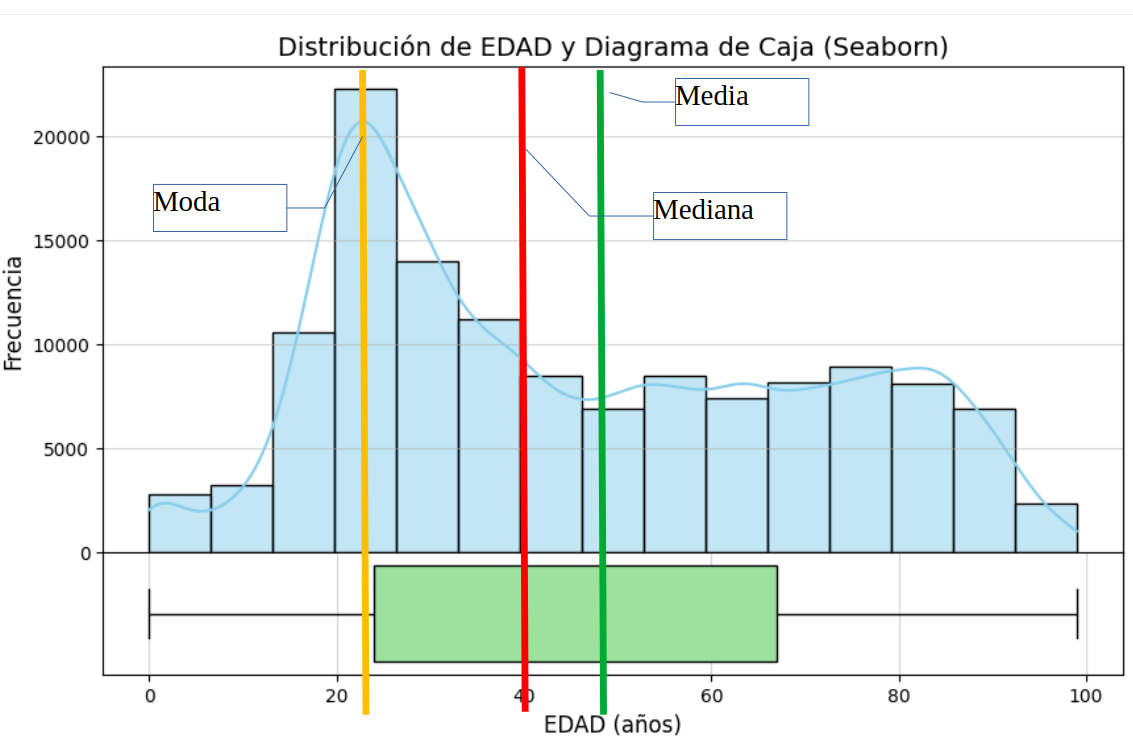




VER QUE acciones tomar en la columna EDAD.

## Columna GENERO

Contar valores con Pandas

In [ ]:
# Contar la cantidad de valores NaN en la columna 'Genero'

emergencia_data['GENERO'] = emergencia_data['GENERO'].replace('', np.nan)

nan_count_genero = emergencia_data['GENERO'].isna().sum()

print(f"Cantidad de valores NaN en la columna 'GENERO': {nan_count_genero} \n")
print(f"Cantidad de valores en la columna 'GENERO': {len(emergencia_data) - nan_count_genero}  \n")

print(f"Porcentaje de valores en la columna 'GENERO': {nan_count_genero / len(emergencia_data) *100 }  \n")

Cantidad de valores NaN en la columna 'GENERO': 112252 

Cantidad de valores en la columna 'GENERO': 129989  

Porcentaje de valores en la columna 'GENERO': 46.338976473842166  



Generacion con  POLARS




In [16]:
emergencia_data_pl = emergencia_data_pl.with_columns(
    pl.when(pl.col('GENERO') == '')
    .then(None) # Reemplazar la cadena vacía con null
    .otherwise(pl.col('GENERO'))
    .alias('GENERO') # Sobrescribir la columna original
)

# Cantidad de valores nulos (null)
cantidad_nan_genero = emergencia_data_pl.select(
    pl.col('GENERO').is_null().sum()
).item() # .item() extrae el valor único de la serie resultante



total_lineas = emergencia_data_pl.height # total de líneas

# 4. Cálculos y resultados
cantidad_genero = total_lineas - cantidad_nan_genero
nan_porcentaje_genero = (nan_count_genero / total_lineas) * 100

print(f"Cantidad de valores NaN en la columna 'GENERO': {nan_count_genero}")
print(f"Cantidad de valores en la columna 'GENERO': {cantidad_genero}")
print(f"Porcentaje de valores NaN en la columna 'GENERO': {nan_porcentaje_genero:.4f} %")


NameError: name 'nan_count_genero' is not defined

# Trabajo para la columna GENERO

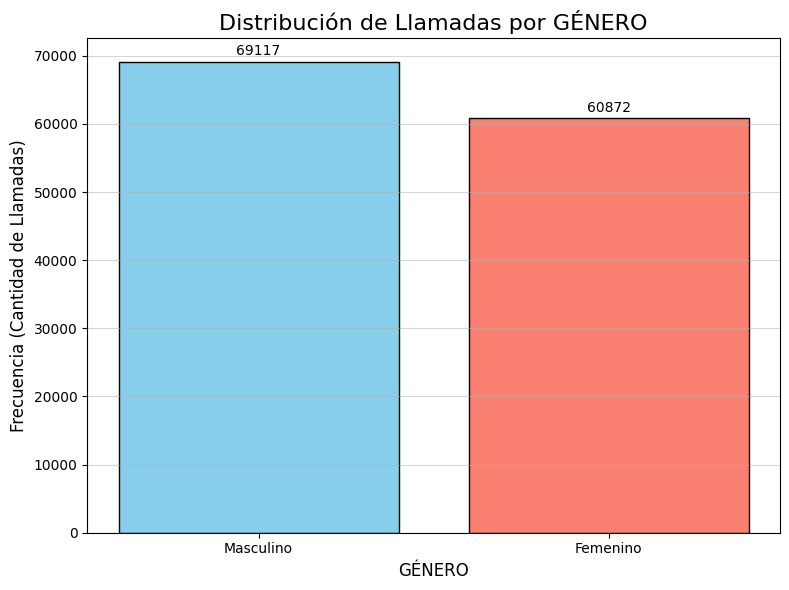

In [ ]:
# histograma por genero.

emergencia_data['GENERO'].replace(['', ' '], np.nan, inplace=True)

# 2. Contar las ocurrencias de cada valor único en 'GENERO'
gendero_contar = emergencia_data['GENERO'].value_counts()

# 3. Generar el gráfico de barras
plt.figure(figsize=(8, 6))

bars = plt.bar(
    gendero_contar.index,
    gendero_contar.values,
    color=['skyblue', 'salmon', 'lightgreen'],
    edgecolor='black'
)

plt.title('Distribución de Llamadas por GÉNERO', fontsize=16)
plt.xlabel('GÉNERO', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Llamadas)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Añadir etiquetas de conteo
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('grafico_de_distribucion_barra_genero.png')
plt.show()

# Trabajo para la columna tipo de incidente

In [ ]:
# Cantidad de incidentes
tipos_incidentes = emergencia_data['TIPO_INCIDENTE'].nunique()

print(f"Cantida de tipos de incidentes :{tipos_incidentes} \n ")
print(emergencia_data['TIPO_INCIDENTE'].unique())

print("\n\n")



Cantida de tipos de incidentes :81 
 
['Lesiones personales' 'Dolor torácico'
 'Inconsciente/paro cardiorrespiratorio'
 'Accidente de tránsito con heridos/muertos' 'Herido con pólvora'
 'Intento de suicidio' 'Disparos' 'Enfermo' 'Heridos'
 'Dificultad respiratoria' 'Caída' 'Trastorno mental' 'Intoxicaciones'
 'Convulsiones' 'Incidente rescate acuático' 'Accidente cerebro vascular'
 'Quemaduras' 'Síntomas gastrointestinales' 'Riña' 'Embriaguez'
 'Ideas de suicidio' 'Incendio estructural'
 'Patología gineco - obstétrica' 'Incendio forestal' 'Muerte natural'
 'Violencia sexual' 'Verificar situación' 'Abrir domicilio'
 'Sangrado vaginal' 'Incendio vehicular' 'Accidente tránsito simple'
 'Rescates' 'Persona pidiendo auxilio' 'Habitante de la calle' nan
 'Persona tendida en la vía' 'Electrocución / rescate'
 'Fuga de gas natural o propano' 'Solicitud apoyo / desacato'
 'Elemento caído y/o en peligro de caer.' 'Animal peligroso'
 'Atraco / hurto en proces' 'Muerto' 'Explosión'
 'Extraviados /

 ## Agrupar por 'TIPO_INCIDENTE' y calcular la mediana  por grupo.


In [ ]:
#Agrupar por 'TIPO_INCIDENTE' y  calcular la mediana de la "EDAD"
mediana_edad_por_accidente = emergencia_data.groupby('TIPO_INCIDENTE')['EDAD'].median()

#Agrupar por 'TIPO_INCIDENTE' y calcular la cantidad total de incidentes.
cantidad_por_accidente = emergencia_data.groupby('TIPO_INCIDENTE')['EDAD'].count()

# Sacar solo filas donde EDAD es NaN
registros_nan_edad = emergencia_data[emergencia_data['EDAD'].isna()]

# Cuenta la cantidad de los TIPO_INCIDENTE en este subconjunto
conteo_nan_por_incidente = registros_nan_edad['TIPO_INCIDENTE'].value_counts()

# Procede a agrupar informacion
resultados_combinados = pd.DataFrame({
    'Edad Mediana': mediana_edad_por_accidente,
    'Cantidad de Registros': cantidad_por_accidente,
    'valores NaN en EDAD': conteo_nan_por_incidente
}).reset_index()

# se ordena por la Edad Mediana para toma de decisiones.
resultados_combinados_ordenados = resultados_combinados.sort_values(
    by='Edad Mediana',
    ascending=False
)


print(resultados_combinados_ordenados.to_string(index=False))


                           TIPO_INCIDENTE  Edad Mediana  Cantidad de Registros  valores NaN en EDAD
                        Rapto / secuestro          84.0                      1                  1.0
               Menor o persona abandonada          75.0                      9                 12.0
                          Abrir domicilio          74.0                     49                 34.0
                                Fallecido          72.0                      1                  1.0
                      Evento respiratorio          72.0                    916                488.0
                           Muerte natural          72.0                    181                296.0
         Accidente cerebro vascular (acv)          70.0                      3                  4.0
                  Dificultad respiratoria          69.0                  15992               5597.0
               Accidente cerebro vascular          68.0                   3817               1492.0


# Trabajo para la columna PRIORIDAD

Cantidad de tipos de prioridad sin repeticiones: 3 
 
['Alta' 'Media' 'Baja' nan]





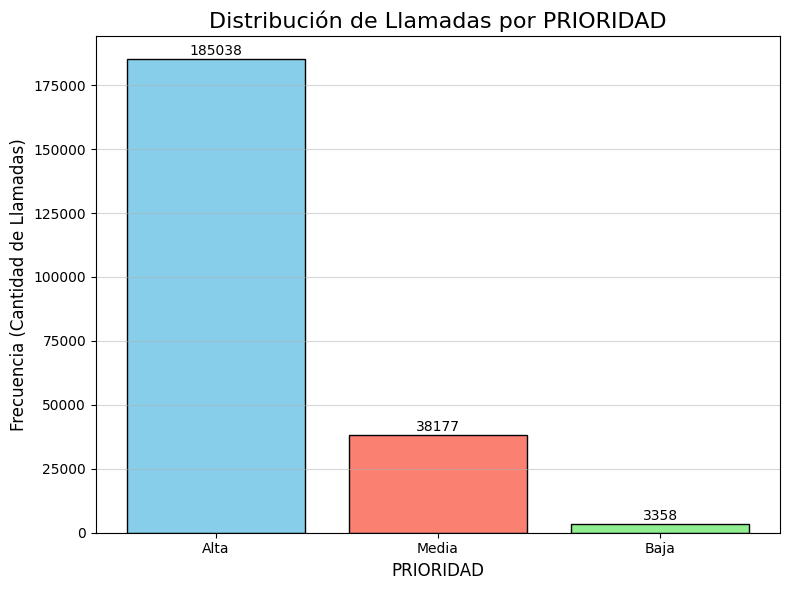

In [ ]:
# histograma por prioridad.

# Cantidad estados de prioridad

cantidad_PRIORIDAD = emergencia_data['PRIORIDAD'].nunique()

print(f"Cantidad de tipos de prioridad sin repeticiones: {cantidad_PRIORIDAD} \n ")
print(emergencia_data['PRIORIDAD'].unique())

print("\n\n")
emergencia_data['PRIORIDAD'].replace(['', ' '], np.nan, inplace=True)

# 2. Contar las ocurrencias de cada valor único en 'GENERO'
prioridad_contar = emergencia_data['PRIORIDAD'].value_counts()

# 3. Generar el gráfico de barras
plt.figure(figsize=(8, 6))

bars = plt.bar(
    prioridad_contar.index,
    prioridad_contar.values,
    color=['skyblue', 'salmon', 'lightgreen'],
    edgecolor='black'
)

plt.title('Distribución de Llamadas por PRIORIDAD', fontsize=16)
plt.xlabel('PRIORIDAD', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Llamadas)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Añadir etiquetas de conteo
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('grafico_de_distribución_barra.png')
plt.show()

# Trabajo para la columna Clasificación final

In [ ]:

print("\n\n")


# Cantidad de clasificacion final

cantidad_CLASIFICACION = emergencia_data['CLASIFICACION_FINAL'].nunique()

print(f"Cantidad de tipos de clasificacion final  sin repeticiones: {cantidad_CLASIFICACION} \n ")
print(emergencia_data['CLASIFICACION_FINAL'].unique())





Cantidad de tipos de clasificacion final  sin repeticiones: 9 
 
['Cancelado' 'Traslado' 'Falsa Alarma' 'Trasladado por Otro Recurso'
 'Desistimiento' 'No Ubica' 'Fallecido' 'Trasladado por Otro'
 'No Amerita Traslado' nan]


# CONCLUSIONES

## PANDAS VS POLARS

Polars se enfoca en la eficiencia y utiliza un enfoque de expresiones para realizar los cálculos de manera optimizada, a menudo ejecutando múltiples agregaciones en un solo paso (.select()).

A comparacion de pandas.. con polar hay que llevar control de los valores pues no permite sacar calculos  si en el conjunto contiene valores nulos o NaN, tal como se trabajó en la columna EDAD.






## MATPLOLIB VS SEABORN

es excelente para combinar histogramas y diagramas de caja (boxplots) de una manera más concisa.

En lugar de usar matplotlib para construir los dos gráficos manualmente, utilizaremos la función sns.histplot para el histograma y le indicaremos que añada un diagrama de caja en la parte superior (kde=False, binwidth=..., etc.) o usaremos la función sns.boxplot para el diagrama de caja por separado en el subgráfico inferior.

Para replicar la estructura de dos paneles compartiendo el eje X con Seaborn, la forma más común es seguir usando matplotlib.pyplot.subplots y luego pasar los ejes (ax_hist y ax_box) a las funciones de Seaborn.

